# Partielle differensialligninger

## Diffusjonsligningen, eksplisitt skjema

$$
\frac{\partial T}{\partial t} = k\frac{\partial^2 T}{\partial x^2}
$$
med diskretisering
$$
T^n_i = T(i\Delta x, n\Delta t)
$$
gir eksplisitt skjema
$$
\frac{T^{n + 1}_i - T^n_i}{\Delta t} = k \frac{T^n_{i + 1} - 2 T^n_i + T^n_{i - 1}}{\Delta x^2}
$$
som kan løses for $T^{n + 1}_i$
$$
T^{n + 1}_i = T^n_i + \alpha(T^n_{i + 1} - 2 T^n_i + T^n_{i - 1}), \quad \alpha = k \Delta t / \Delta x^2
$$
Initialbetingelse
$$
T(x, 0) = T_0(x)
$$

### Dirichlet-randbetingelse

$$
T(0, t) = T_l(t), \quad T(1, t) = T_r(t)
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parametre

N_punkter = 50
N_tider = 100
alpha = .4      # k * dt / dx**2

# Initialiser

x = np.linspace(0, 1, N_punkter)
T = np.ones((N_tider, N_punkter))
T[:, N_punkter // 2:] = 0

# Løs diffusjonsligninger

for n in range(N_tider - 1): 
    T[n + 1, 1:-1] = T[n, 1:-1] + alpha * (T[n, 0:-2] - 2 * T[n, 1:-1] + T[n, 2:])

### Lag animasjon

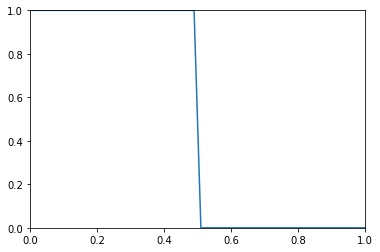

In [2]:
import matplotlib.animation
from IPython.display import HTML

# Sett opp

fig, ax = plt.subplots()
ax.axis([0, 1, 0, 1])
l, = ax.plot([],[])

# Animasjonsfunksjonen

def animate(n):
    l.set_data(x, T[n, :])

# Snurr film!

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=N_tider)
HTML(ani.to_jshtml())

### Neumann-randbetingelser

$$
T'(0, t) = T_l(t), \quad T'(1, t) = T_r(t)
$$
Her:
$$
\frac{\partial T}{\partial n} = 0
$$
kan implementeres med $T^n_0 = T^n_1$ og $T^n_{N - 1} = T^n_{N - 2}$

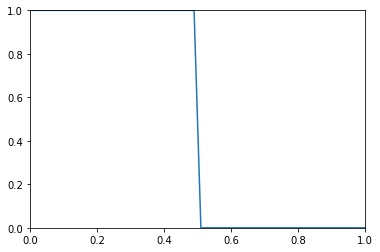

In [3]:
# Parametre

N_punkter = 50
N_tider = 300
alpha = .4      # k * dt / dx**2

# Initialiser

x = np.linspace(0, 1, N_punkter)
T = np.ones((N_tider, N_punkter))
T[:, N_punkter // 2:] = 0

# Løs diffusjonsligninger

for n in range(N_tider - 1): 
    T[n + 1, 1:-1] = T[n, 1:-1] + alpha * (T[n, 0:-2] - 2 * T[n, 1:-1] + T[n, 2:])# Initialiser
    T[n + 1, 0] = T[n + 1, 1]
    T[n + 1, -1] = T[n + 1, -2]

# Sett opp

fig, ax = plt.subplots()
ax.axis([0, 1, 0, 1])
l, = ax.plot([],[])

# Animasjonsfunksjonen

def animate(n):
    l.set_data(x, T[n, :])

# Snurr film!

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=N_tider)
HTML(ani.to_jshtml())

## Implisitt metode

Sett opp system for tridiagonal matrise og overlat jobben til Python

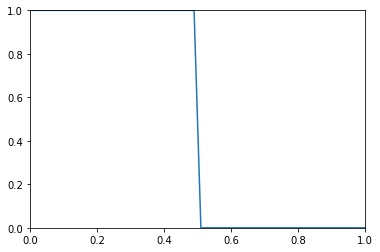

In [4]:
from scipy.sparse import spdiags

# Parametre

N_punkter = 50
N_tider = 10
alpha = 10      # k * dt / dx**2

# Initialiser

x = np.linspace(0, 1, N_punkter)
T = np.ones((N_tider, N_punkter))
T[:, N_punkter // 2:] = 0

# Systemmatrisen

upperdiag = np.concatenate(([0, 0], -alpha * np.ones(N_punkter - 2)))
centerdiag = np.concatenate(([1], (1 + 2 * alpha) * np.ones(N_punkter - 2),
                             [1]))
lowerdiag = np.concatenate((-alpha * np.ones(N_punkter - 2), [0, 0]))
diags = np.array([upperdiag, centerdiag, lowerdiag])
A = spdiags(diags, [1, 0, -1], N_punkter, N_punkter).todense()

# Løs diffusjonsligningen

for n in range(N_tider - 1):
    T[n + 1, :] = np.linalg.solve(A, T[n, :])

# Sett opp

fig, ax = plt.subplots()
ax.axis([0, 1, 0, 1])
l, = ax.plot([],[])

# Animasjonsfunksjonen

def animate(n):
    l.set_data(x, T[n, :])

# Snurr film!

ani = matplotlib.animation.FuncAnimation(fig, animate, frames=N_tider)
HTML(ani.to_jshtml())